## CHICAGO CAR ACCIDENTS

#### OVERVIEW

This project aims to create a predictive model and provide insights into the primary contributory cause of a vehicle accident based on data about the vehicle, passengers, and external factors like road conditions, weather, etc.

#### BUSINESS UNDERSTANDING

On an average span of four days, Chicago can record up to over a thousand car accidents. When you include drivers, passengers, pedestrians and cyclists, up to two thousand people can be effected. Forty-five percent of the people will experience a minor to fatal injury.
If the cause for an incident is known, a city can then plan appropriately as to what measures should be taken to prevent them from happening again.

#### DATA

The data comes from the Chicago Data Portal, maintained by the city of Chicago. The dataset contains all traffic crashes that were reported by the police within the city limits. With the crash dataset, two datasets corresponding to Vehicles and Persons involved in the crash are attached. Each crash incident has a unique crash record ID and report number, which allows for cross-referencing.

#### METHODOLOGY

Due to the many categorical features that can influence functionality, this project investigates features and their effects through different types of models in an attempt to best predict the primary contributory cause of accidents. This is done through the use of logistic regression, decision trees, random forest and gradient boosting.

#### IMPORT LIBRARIES & DATA

In [1]:
# Importing the neccessary libraries 
# Import relevant Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_predict, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, LabelBinarizer, label_binarize

from sklearn.preprocessing import OneHotEncoder

In [2]:
# Importing the csv files
df = pd.read_csv('data/Traffic_Crashes_-_Crashes.zip', compression = 'zip')
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [3]:
df.shape

(879740, 48)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879740 entries, 0 to 879739
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                879740 non-null  object 
 1   CRASH_DATE_EST_I               65200 non-null   object 
 2   CRASH_DATE                     879740 non-null  object 
 3   POSTED_SPEED_LIMIT             879740 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         879740 non-null  object 
 5   DEVICE_CONDITION               879740 non-null  object 
 6   WEATHER_CONDITION              879740 non-null  object 
 7   LIGHTING_CONDITION             879740 non-null  object 
 8   FIRST_CRASH_TYPE               879740 non-null  object 
 9   TRAFFICWAY_TYPE                879740 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      879740 non-null  object 
 12  ROADWAY_SURFACE_COND          

#### DATA CLEANING

From the info on the data, there are a number of columns in the dataset that are irrelevant. There are a number of columns dealing with post-crash details such as injuries as well as other administrative details,there are also columns with a high number of missing values.

In [5]:
df[df['CRASH_DATE_EST_I'].notnull()]

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
8,36360857c079418cba1b1d70cf653595bbfb4566de8fcb...,Y,01/01/2022 04:32:00 PM,10,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,PARKING LOT,...,0.0,0.0,2.0,0.0,16,7,1,NaN,NaN,NaN
63,8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...,Y,09/06/2023 11:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,11,4,9,41.937252,-87.776321,POINT (-87.776320528037 41.937252170984)
86,3b3558c02e1b695ff6f79d6b4bcaf8cb220eb83d519454...,Y,08/11/2023 10:15:00 PM,5,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,22,6,8,NaN,NaN,NaN
94,bde92bfca22985fc0b0354b01d1eb8b71e312ff6b171c1...,Y,08/20/2023 07:00:00 AM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,DRIVEWAY,...,0.0,0.0,1.0,0.0,7,1,8,41.777122,-87.692925,POINT (-87.692925138017 41.777121674979)
101,d933cc5ab49d3b7a1d1429fdcf1611a3398d13dbbde9aa...,Y,09/21/2023 08:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,2.0,0.0,20,5,9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879647,e860739bf6371379aac2780cea1f1db2963a7b7fa6c5bd...,Y,10/03/2024 07:00:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DUSK,FIXED OBJECT,ROUNDABOUT,...,0.0,0.0,1.0,0.0,19,5,10,41.740685,-87.568559,POINT (-87.568559315121 41.74068525818)
879670,d996490d497d4a688a68a84e64d3b8e4ca8b5287d3234f...,N,10/03/2024 09:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,OTHER,...,0.0,0.0,1.0,0.0,9,5,10,41.704657,-87.656968,POINT (-87.656967709864 41.704657080424)
879688,9bed452ceab86a1274675a7f9c3ac17ca19643c72b2e7c...,Y,08/28/2024 01:00:00 PM,20,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,13,4,8,41.888296,-87.753988,POINT (-87.753988262533 41.888295726666)
879731,5914c45ccb3f73c5ad90016bbbc05e4d6ed245dc2ba4e5...,Y,09/27/2019 04:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,PEDESTRIAN,NOT DIVIDED,...,1.0,0.0,1.0,0.0,16,6,9,41.736402,-87.613906,POINT (-87.613906262901 41.736402347964)


In [6]:
admin_data = ['CRASH_DATE_EST_I','REPORT_TYPE','DATE_POLICE_NOTIFIED','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I']
data_no_admin = df.drop(columns = admin_data,axis = 1)

In [7]:
data_no_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879740 entries, 0 to 879739
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                879740 non-null  object 
 1   CRASH_DATE                     879740 non-null  object 
 2   POSTED_SPEED_LIMIT             879740 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         879740 non-null  object 
 4   DEVICE_CONDITION               879740 non-null  object 
 5   WEATHER_CONDITION              879740 non-null  object 
 6   LIGHTING_CONDITION             879740 non-null  object 
 7   FIRST_CRASH_TYPE               879740 non-null  object 
 8   TRAFFICWAY_TYPE                879740 non-null  object 
 9   LANE_CNT                       199017 non-null  float64
 10  ALIGNMENT                      879740 non-null  object 
 11  ROADWAY_SURFACE_COND           879740 non-null  object 
 12  ROAD_DEFECT                   

In [8]:
data_no_admin[data_no_admin['LANE_CNT'].notnull()]

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
17,4502c89bb17d2a4817c517541350b1470636cc9c29e6fd...,02/19/2019 05:30:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,REAR END,ONE-WAY,2.0,...,0.0,0.0,2.0,0.0,5,3,2,NaN,NaN,NaN
81,87a5f1913061fbfc022966ccc7949e7b93507cee6cb27e...,11/02/2016 04:49:00 PM,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DUSK,ANGLE,OTHER,4.0,...,0.0,0.0,2.0,0.0,16,4,11,NaN,NaN,NaN
131,b8bede6e04aeda61e7fd297157a58feff4cc86a0cabcc6...,08/26/2018 12:11:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,OTHER,4.0,...,0.0,0.0,2.0,0.0,12,1,8,NaN,NaN,NaN
177,dcfd1fbeacb8a918e7404fdb0dd8e9faadcbc6c8dececf...,06/22/2018 05:27:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,0.0,...,0.0,0.0,0.0,0.0,17,6,6,NaN,NaN,NaN
546,01fc5f2a9657da8969b3f0c3eaab0b20da2a81ecac5023...,12/16/2018 10:45:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,4.0,...,0.0,0.0,3.0,0.0,10,1,12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879362,faccdde92fb871184f68228bce995062012d66b89b1b38...,03/27/2019 09:36:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,4.0,...,0.0,0.0,2.0,0.0,21,4,3,41.880834,-87.725797,POINT (-87.725796597174 41.880834299772)
879372,fc637240524f494b339c8417c0527bd011ed4a08bf7077...,05/24/2018 08:30:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DUSK,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),2.0,...,0.0,0.0,2.0,0.0,20,5,5,41.726851,-87.648788,POINT (-87.648787911154 41.726850549145)
879380,fdd84df84cadb7e639b177a06068f95a6f35e367aba8eb...,03/03/2018 07:11:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,2.0,...,0.0,3.0,3.0,0.0,7,7,3,41.765291,-87.644562,POINT (-87.644562127496 41.765291024572)
879713,67dd84a904e46800b722c9f368de8b3e634864ff30099a...,03/04/2019 06:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,...,0.0,0.0,2.0,0.0,18,2,3,41.953760,-87.727480,POINT (-87.727480334329 41.953759575772)


In [9]:
data_no_admin = data_no_admin.drop(['LANE_CNT'], axis = 1)
data_no_admin.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [10]:
data_no_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879740 entries, 0 to 879739
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                879740 non-null  object 
 1   CRASH_DATE                     879740 non-null  object 
 2   POSTED_SPEED_LIMIT             879740 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         879740 non-null  object 
 4   DEVICE_CONDITION               879740 non-null  object 
 5   WEATHER_CONDITION              879740 non-null  object 
 6   LIGHTING_CONDITION             879740 non-null  object 
 7   FIRST_CRASH_TYPE               879740 non-null  object 
 8   TRAFFICWAY_TYPE                879740 non-null  object 
 9   ALIGNMENT                      879740 non-null  object 
 10  ROADWAY_SURFACE_COND           879740 non-null  object 
 11  ROAD_DEFECT                    879740 non-null  object 
 12  CRASH_TYPE                    

In [11]:
data_no_admin[data_no_admin['INTERSECTION_RELATED_I'].notnull()]

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
10,b236c77d59e32b7b469a6e2f17f438b7457e1bd8bc689b...,07/29/2023 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,13,7,7,NaN,NaN,NaN
11,3b6d23138e3f009e54ae5ef25061e9e96fe44fd0e62afa...,12/09/2021 10:30:00 AM,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,10,5,12,NaN,NaN,NaN
14,14386daec6219c6032b71612b28f0e4cd38e2898f39aae...,08/13/2023 12:11:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,0,1,8,NaN,NaN,NaN
20,c9053169f9e6d24f3035623ecfd0a70c1cb3adba409b7d...,09/22/2023 10:46:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,22,6,9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879714,bf86786457a08ebccd20d6480ed2c5c295e04a51004578...,06/09/2020 08:00:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,20,3,6,41.777927,-87.638835,POINT (-87.638834655301 41.777926777918)
879717,bfa8377168b8dc75b4a09bf627b4e28fc77f465911c99b...,09/13/2023 01:08:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,13,4,9,41.923913,-87.637409,POINT (-87.637408804478 41.923913444256)
879719,5bda1ba236fc7e7206dd5ed31f57591dbe50ff8134e707...,12/16/2022 12:10:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,12,6,12,41.916235,-87.667838,POINT (-87.66783777213 41.916235337469)
879729,bc2876dcd7c4098806301cb646232eb8f65c86a4f418b7...,05/28/2023 01:20:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,UNKNOWN,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,1,1,5,41.851497,-87.719932,POINT (-87.719931713533 41.851497025522)


In [12]:
y_cols = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORKERS_PRESENT_I']
for col in y_cols:
    print(data_no_admin[col].value_counts())
    print('Number of nulls:' , data_no_admin[col].isnull().sum())
    print("")

INTERSECTION_RELATED_I
Y    192163
N      9619
Name: count, dtype: int64
Number of nulls: 677958

NOT_RIGHT_OF_WAY_I
Y    36507
N     3689
Name: count, dtype: int64
Number of nulls: 839544

HIT_AND_RUN_I
Y    263997
N     11839
Name: count, dtype: int64
Number of nulls: 603904

DOORING_I
Y    1874
N     909
Name: count, dtype: int64
Number of nulls: 876957

WORK_ZONE_I
Y    3830
N    1130
Name: count, dtype: int64
Number of nulls: 874780

WORKERS_PRESENT_I
Y    1128
N     147
Name: count, dtype: int64
Number of nulls: 878465



In [13]:
# Replace the Ys with 1 and every other entry with 0
for col in y_cols:
    data_no_admin[col] = data_no_admin[col].map(lambda x: 1 if x =='Y' else 0)
    print(data_no_admin[col].value_counts())
    print('Number of nulls:' , data_no_admin[col].isnull().sum())
    print("")

INTERSECTION_RELATED_I
0    687577
1    192163
Name: count, dtype: int64
Number of nulls: 0

NOT_RIGHT_OF_WAY_I
0    843233
1     36507
Name: count, dtype: int64
Number of nulls: 0

HIT_AND_RUN_I
0    615743
1    263997
Name: count, dtype: int64
Number of nulls: 0

DOORING_I
0    877866
1      1874
Name: count, dtype: int64
Number of nulls: 0

WORK_ZONE_I
0    875910
1      3830
Name: count, dtype: int64
Number of nulls: 0

WORKERS_PRESENT_I
0    878612
1      1128
Name: count, dtype: int64
Number of nulls: 0



In [14]:
data_no_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879740 entries, 0 to 879739
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                879740 non-null  object 
 1   CRASH_DATE                     879740 non-null  object 
 2   POSTED_SPEED_LIMIT             879740 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         879740 non-null  object 
 4   DEVICE_CONDITION               879740 non-null  object 
 5   WEATHER_CONDITION              879740 non-null  object 
 6   LIGHTING_CONDITION             879740 non-null  object 
 7   FIRST_CRASH_TYPE               879740 non-null  object 
 8   TRAFFICWAY_TYPE                879740 non-null  object 
 9   ALIGNMENT                      879740 non-null  object 
 10  ROADWAY_SURFACE_COND           879740 non-null  object 
 11  ROAD_DEFECT                    879740 non-null  object 
 12  CRASH_TYPE                    

In [15]:
data_no_admin[data_no_admin['WORK_ZONE_TYPE'].notnull()]

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
216,555ed321400f9ef0f6a74300f63ab41044b5a22aee83d3...,09/19/2023 03:20:00 PM,45,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,15,3,9,NaN,NaN,NaN
475,25320f6cbb540dde38a4af7cf8111089c214fc22be1d89...,09/18/2023 09:00:00 AM,30,OTHER WARNING SIGN,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,9,2,9,41.979255,-87.728189,POINT (-87.728188507001 41.979254802019)
769,0474a8dfe651dd4d4a027063236d011a931bc2936551c6...,09/21/2018 06:27:00 AM,35,OTHER,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,"CURVE, LEVEL",...,0.0,0.0,4.0,0.0,6,6,9,NaN,NaN,NaN
775,05995ddabf59b34e77521980ffe2735b6560c8358df8b8...,05/17/2022 02:45:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,14,3,5,41.916960,-87.701927,POINT (-87.701927401978 41.91696035001)
950,0b20ea43ef78272a119398871f0bbf10be79772c30ad8a...,07/24/2023 09:00:00 PM,40,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,21,2,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877992,1a5a642e5cb0eed349719ef60f7b9be58921344da89347...,05/23/2023 09:20:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,OTHER OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,9,3,5,41.872041,-87.633645,POINT (-87.633645484534 41.872040758511)
878690,8f1cce66e7bc8648b352e60a71cd6aefcdcfa6fc4f7318...,08/14/2019 10:50:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,1.0,2.0,0.0,10,4,8,41.891647,-87.637590,POINT (-87.637590143245 41.891647060358)
878746,97ce4aa573a05f9ff4416303a396889d015d1e3c4ea884...,04/22/2023 10:30:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,FIXED OBJECT,UNKNOWN,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,22,7,4,41.963266,-87.646922,POINT (-87.646922415275 41.963266406281)
879276,ecbe2d0c3524c7c8c97eed7ae6ee7d01e5055f22ef5fe4...,06/28/2023 10:05:00 AM,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,10,4,6,41.874331,-87.639601,POINT (-87.639600735438 41.874330690014)


In [16]:
data_no_admin['WORK_ZONE_TYPE'].value_counts()

WORK_ZONE_TYPE
CONSTRUCTION    2654
UNKNOWN          542
MAINTENANCE      393
UTILITY          241
Name: count, dtype: int64

In [17]:
#Dropping work zone type because it is not related to other entries in the dataset
data_no_admin = data_no_admin.drop(['WORK_ZONE_TYPE'], axis = 1)
data_no_admin.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [18]:
data_no_admin['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 343762
FAILING TO YIELD RIGHT-OF-WAY                                                        96965
FOLLOWING TOO CLOSELY                                                                84963
NOT APPLICABLE                                                                       46641
IMPROPER OVERTAKING/PASSING                                                          43753
FAILING TO REDUCE SPEED TO AVOID CRASH                                               36967
IMPROPER BACKING                                                                     34175
IMPROPER LANE USAGE                                                                  31351
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  29810
IMPROPER TURNING/NO SIGNAL                                                           29404
DISREGARDING TRAFFIC SIGNALS                                      

In [19]:
# removing the incidents whereby the causes are unknown or were unable to be determined
utd = data_no_admin[data_no_admin['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE']
utd['SEC_CONTRIBUTORY_CAUSE'].value_counts()
#utd - unable to determine

SEC_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 202690
NOT APPLICABLE                                                                      132483
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   1864
FAILING TO REDUCE SPEED TO AVOID CRASH                                                 971
WEATHER                                                                                796
IMPROPER LANE USAGE                                                                    675
FOLLOWING TOO CLOSELY                                                                  663
FAILING TO YIELD RIGHT-OF-WAY                                                          662
HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)                                        378
PHYSICAL CONDITION OF DRIVER                                                           357
IMPROPER OVERTAKING/PASSING                                        

In [20]:
n_a = data_no_admin[data_no_admin['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE']
n_a['SEC_CONTRIBUTORY_CAUSE'].value_counts()
#n_a - not applicable

SEC_CONTRIBUTORY_CAUSE
NOT APPLICABLE                                                                      43527
UNABLE TO DETERMINE                                                                  1947
FAILING TO REDUCE SPEED TO AVOID CRASH                                                124
FAILING TO YIELD RIGHT-OF-WAY                                                         112
WEATHER                                                                                96
FOLLOWING TOO CLOSELY                                                                  93
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                    92
IMPROPER OVERTAKING/PASSING                                                            75
IMPROPER BACKING                                                                       69
IMPROPER LANE USAGE                                                                    63
IMPROPER TURNING/NO SIGNAL                                                   

In [21]:
test_data = data_no_admin.copy()
test_data.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [22]:
test_data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 343762
FAILING TO YIELD RIGHT-OF-WAY                                                        96965
FOLLOWING TOO CLOSELY                                                                84963
NOT APPLICABLE                                                                       46641
IMPROPER OVERTAKING/PASSING                                                          43753
FAILING TO REDUCE SPEED TO AVOID CRASH                                               36967
IMPROPER BACKING                                                                     34175
IMPROPER LANE USAGE                                                                  31351
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  29810
IMPROPER TURNING/NO SIGNAL                                                           29404
DISREGARDING TRAFFIC SIGNALS                                      

In [23]:
# Iterate over the rows where the primary cause wasn't determined and replace with a secondary cause
for index, row in test_data.iterrows(): 
    if test_data.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE':
        if (test_data.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE') & (test_data.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE'):
            test_data.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] = test_data.loc[index,'SEC_CONTRIBUTORY_CAUSE']

In [24]:
test_data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 335173
FAILING TO YIELD RIGHT-OF-WAY                                                        97627
FOLLOWING TOO CLOSELY                                                                85626
NOT APPLICABLE                                                                       46641
IMPROPER OVERTAKING/PASSING                                                          44054
FAILING TO REDUCE SPEED TO AVOID CRASH                                               37938
IMPROPER BACKING                                                                     34468
IMPROPER LANE USAGE                                                                  32026
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  31674
IMPROPER TURNING/NO SIGNAL                                                           29568
DISREGARDING TRAFFIC SIGNALS                                      

In [25]:
for index, row in test_data.iterrows(): 
    if test_data.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE':
        if (test_data.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE') & (test_data.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE'):
            test_data.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] = test_data.loc[index,'SEC_CONTRIBUTORY_CAUSE']

In [26]:
test_data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 335173
FAILING TO YIELD RIGHT-OF-WAY                                                        97739
FOLLOWING TOO CLOSELY                                                                85719
NOT APPLICABLE                                                                       45474
IMPROPER OVERTAKING/PASSING                                                          44129
FAILING TO REDUCE SPEED TO AVOID CRASH                                               38062
IMPROPER BACKING                                                                     34537
IMPROPER LANE USAGE                                                                  32089
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  31766
IMPROPER TURNING/NO SIGNAL                                                           29625
DISREGARDING TRAFFIC SIGNALS                                      

In [27]:
primary = test_data.drop(['SEC_CONTRIBUTORY_CAUSE'],axis = 1)

In [28]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879740 entries, 0 to 879739
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                879740 non-null  object 
 1   CRASH_DATE                     879740 non-null  object 
 2   POSTED_SPEED_LIMIT             879740 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         879740 non-null  object 
 4   DEVICE_CONDITION               879740 non-null  object 
 5   WEATHER_CONDITION              879740 non-null  object 
 6   LIGHTING_CONDITION             879740 non-null  object 
 7   FIRST_CRASH_TYPE               879740 non-null  object 
 8   TRAFFICWAY_TYPE                879740 non-null  object 
 9   ALIGNMENT                      879740 non-null  object 
 10  ROADWAY_SURFACE_COND           879740 non-null  object 
 11  ROAD_DEFECT                    879740 non-null  object 
 12  CRASH_TYPE                    

In [29]:
known_causes = primary.loc[(primary['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE')]
known_causes = known_causes.loc[(primary['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE')]
known_causes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499093 entries, 1 to 879739
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                499093 non-null  object 
 1   CRASH_DATE                     499093 non-null  object 
 2   POSTED_SPEED_LIMIT             499093 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         499093 non-null  object 
 4   DEVICE_CONDITION               499093 non-null  object 
 5   WEATHER_CONDITION              499093 non-null  object 
 6   LIGHTING_CONDITION             499093 non-null  object 
 7   FIRST_CRASH_TYPE               499093 non-null  object 
 8   TRAFFICWAY_TYPE                499093 non-null  object 
 9   ALIGNMENT                      499093 non-null  object 
 10  ROADWAY_SURFACE_COND           499093 non-null  object 
 11  ROAD_DEFECT                    499093 non-null  object 
 12  CRASH_TYPE                     4990

In [30]:
known_causes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
FAILING TO YIELD RIGHT-OF-WAY                                                       97739
FOLLOWING TOO CLOSELY                                                               85719
IMPROPER OVERTAKING/PASSING                                                         44129
FAILING TO REDUCE SPEED TO AVOID CRASH                                              38062
IMPROPER BACKING                                                                    34537
IMPROPER LANE USAGE                                                                 32089
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 31766
IMPROPER TURNING/NO SIGNAL                                                          29625
DISREGARDING TRAFFIC SIGNALS                                                        17330
WEATHER                                                                             13622
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MA

In [31]:
known_causes.info

<bound method DataFrame.info of                                           CRASH_RECORD_ID  \
1       2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...   
2       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
3       7ebf015016f83d09b321afd671a836d6b148330535d5df...   
4       6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...   
8       36360857c079418cba1b1d70cf653595bbfb4566de8fcb...   
...                                                   ...   
879731  5914c45ccb3f73c5ad90016bbbc05e4d6ed245dc2ba4e5...   
879733  45d62ddd4e4b5572d253cc072b3927afc15489728f1ba8...   
879736  cb0ca76762ca65feacb1f6513312f96f2a05629bd8a866...   
879737  ede74fa6fd507334cd0415d3d53deb535d27d23523cd38...   
879739  e88a7d78baea3f2de14f0042ce24937d03ca58553c7102...   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
1       09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2       07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3   

In [32]:
known_causes = known_causes.dropna()
known_causes.info

<bound method DataFrame.info of                                           CRASH_RECORD_ID  \
2       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
46      c107aea0fb8320ca5e7676759af9399cffe67f3ac8e429...   
56      db61137bc4bb19b84665da12c4c367592e874c623f76a1...   
63      8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...   
74      f1779af8b006d956f29723ac415bd54b61ef9acf84e38e...   
...                                                   ...   
879731  5914c45ccb3f73c5ad90016bbbc05e4d6ed245dc2ba4e5...   
879733  45d62ddd4e4b5572d253cc072b3927afc15489728f1ba8...   
879736  cb0ca76762ca65feacb1f6513312f96f2a05629bd8a866...   
879737  ede74fa6fd507334cd0415d3d53deb535d27d23523cd38...   
879739  e88a7d78baea3f2de14f0042ce24937d03ca58553c7102...   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
2       07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
46      09/19/2023 05:40:00 PM                  30            NO CONTROLS   
56  

In [35]:
# categorical variables
for col in known_causes.columns:
    print(known_causes[col].value_counts())
    print("")

CRASH_RECORD_ID
5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4106558b34b8a6d2b81af02cf91b576ecd7ced08ffd10fcfd940a84f7613125b89d33636e6075064e22    1
ad3c4ddd0a0213be7413d8e3fb213cca412de75726da2edfffa785a913387173dc35771656e4f94daaf8ca9e62925892ab92de52011cc067ee3c5259f88505c2    1
ad376a54c6d631b5489160b15b3cd11d4505e3a2b62af0d5a06867d9f5d3986bc248dc35abcd2171fb50deb559580f03757860dbe37247c61960031ce5a4754e    1
ad3750d8fe3ef4dcb8f5cb04eca591213f9a3c7faaea16430dddb4213bcaa1ad13c1043d472a637b7f7f5e08a0803e7433ba1ed5255055a6a7ffccac7c221825    1
ad36f21b8d93e821fb8006e79224979088924b6bbb3c672f302b558d441895900d7020e68b8bcfb59680046c7b6092b7a051f44bca76f89cf2487c31c2493301    1
                                                                                                                                   ..
54c91903ff93561256f3d539d6983c1e6454d45d65d294a82e81f6b2153553cb0b00f8824a92abe38f3e1ce2e1d68ef1986d621ea8e5f3d9a9a03e7752459b02    1
54c90601f6002013740c880baa2afff7808088fe3b5f21

In [36]:
categorical_df = known_causes.copy()

In [37]:
# Road_defect to represent 1 if there was defect, 0 for none 
categorical_df['ROADWAY_SURFACE_COND_DRY'] = categorical_df['ROADWAY_SURFACE_COND'].map(lambda x: 1 if ('DRY' in x or 'UNKNOWN' in x ) else 0)
categorical_df = categorical_df.drop(['ROADWAY_SURFACE_COND'], axis = 1)
categorical_df['ROADWAY_SURFACE_COND_DRY'].value_counts()

ROADWAY_SURFACE_COND_DRY
1    400724
0     93981
Name: count, dtype: int64

In [38]:
# Road_defect to represent 1 if there was defect, 0 for none 
categorical_df['ROAD_DEFECT'] = categorical_df['ROAD_DEFECT'].map(lambda x: 0 if ('NO DEFECTS' in x or 'UNKNOWN' in x ) else 1)
categorical_df['ROAD_DEFECT'].value_counts()

ROAD_DEFECT
0    484868
1      9837
Name: count, dtype: int64

In [39]:
# if crash did not result in injury to be represented by 1, 0 if crash resulted in injury and/or tow
categorical_df['CRASH_TYPE_NO_INJURY'] = categorical_df['CRASH_TYPE'].map(lambda x: 1 if ('NO INJURY' in x ) else 0)
categorical_df = categorical_df.drop(['CRASH_TYPE'], axis = 1)
categorical_df['CRASH_TYPE_NO_INJURY'].value_counts()

CRASH_TYPE_NO_INJURY
1    339487
0    155218
Name: count, dtype: int64

In [40]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494705 entries, 2 to 879739
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                494705 non-null  object 
 1   CRASH_DATE                     494705 non-null  object 
 2   POSTED_SPEED_LIMIT             494705 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         494705 non-null  object 
 4   DEVICE_CONDITION               494705 non-null  object 
 5   WEATHER_CONDITION              494705 non-null  object 
 6   LIGHTING_CONDITION             494705 non-null  object 
 7   FIRST_CRASH_TYPE               494705 non-null  object 
 8   TRAFFICWAY_TYPE                494705 non-null  object 
 9   ALIGNMENT                      494705 non-null  object 
 10  ROAD_DEFECT                    494705 non-null  int64  
 11  INTERSECTION_RELATED_I         494705 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I             4947

In [41]:
categorical_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 252429
TRAFFIC SIGNAL              163883
STOP SIGN/FLASHER            59030
UNKNOWN                      10559
OTHER                         3600
YIELD                         1013
LANE USE MARKING               927
OTHER REG. SIGN                738
OTHER WARNING SIGN             536
PEDESTRIAN CROSSING SIGN       459
RAILROAD CROSSING GATE         375
DELINEATORS                    245
FLASHING CONTROL SIGNAL        230
POLICE/FLAGMAN                 205
SCHOOL ZONE                    205
OTHER RAILROAD CROSSING        129
RR CROSSING SIGN                68
NO PASSING                      50
BICYCLE CROSSING SIGN           24
Name: count, dtype: int64

In [42]:
categorical_df['TRAFFIC_CONTROL_DEVICE'] = categorical_df['TRAFFIC_CONTROL_DEVICE'].apply(lambda x: 'SIGNAL' if 'SIGNAL' in x else x)
categorical_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 252429
SIGNAL                      164113
STOP SIGN/FLASHER            59030
UNKNOWN                      10559
OTHER                         3600
YIELD                         1013
LANE USE MARKING               927
OTHER REG. SIGN                738
OTHER WARNING SIGN             536
PEDESTRIAN CROSSING SIGN       459
RAILROAD CROSSING GATE         375
DELINEATORS                    245
POLICE/FLAGMAN                 205
SCHOOL ZONE                    205
OTHER RAILROAD CROSSING        129
RR CROSSING SIGN                68
NO PASSING                      50
BICYCLE CROSSING SIGN           24
Name: count, dtype: int64

In [43]:
categorical_df['DEVICE_CONDITION'].value_counts()

DEVICE_CONDITION
NO CONTROLS                 257734
FUNCTIONING PROPERLY        206362
UNKNOWN                      22153
OTHER                         3927
FUNCTIONING IMPROPERLY        2750
NOT FUNCTIONING               1497
WORN REFLECTIVE MATERIAL       211
MISSING                         71
Name: count, dtype: int64

In [44]:
device_dict = {'NO CONTROLS': 'NO CONTROLS',
               'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
               'UNKNOWN': 'NO CONTROLS',
               'FUNCTIONING IMPROPERLY':'FUNCTIONING IMPROPERLY/ MISSING',
               'NOT FUNCTIONING':'FUNCTIONING IMPROPERLY/ MISSING',
               'WORN REFLECTIVE MATERIAL': 'FUNCTIONING PROPERLY',
               'MISSING': 'FUNCTIONING IMPROPERLY/ MISSING',
               'OTHER': 'FUNCTIONING PROPERLY'}
categorical_df['DEVICE_CONDITION'] = categorical_df['DEVICE_CONDITION'].map(device_dict)
categorical_df['DEVICE_CONDITION'].value_counts()

DEVICE_CONDITION
NO CONTROLS                        279887
FUNCTIONING PROPERLY               210500
FUNCTIONING IMPROPERLY/ MISSING      4318
Name: count, dtype: int64

In [45]:
categorical_df['FIRST_CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE
REAR END                        124024
TURNING                          87834
SIDESWIPE SAME DIRECTION         80205
PARKED MOTOR VEHICLE             71533
ANGLE                            64980
FIXED OBJECT                     19865
PEDESTRIAN                       11395
PEDALCYCLIST                      7892
SIDESWIPE OPPOSITE DIRECTION      6768
REAR TO FRONT                     5676
HEAD ON                           4853
OTHER OBJECT                      3542
REAR TO SIDE                      3333
OTHER NONCOLLISION                1193
REAR TO REAR                       881
ANIMAL                             446
OVERTURNED                         254
TRAIN                               31
Name: count, dtype: int64

In [46]:
categorical_df['FIRST_CRASH_TYPE'] = categorical_df['FIRST_CRASH_TYPE'].apply(lambda x: 'PARKED CAR/OBJECT' if ('PARKED' in x or 'OBJECT' in x) else x)
categorical_df['FIRST_CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE
REAR END                        124024
PARKED CAR/OBJECT                94940
TURNING                          87834
SIDESWIPE SAME DIRECTION         80205
ANGLE                            64980
PEDESTRIAN                       11395
PEDALCYCLIST                      7892
SIDESWIPE OPPOSITE DIRECTION      6768
REAR TO FRONT                     5676
HEAD ON                           4853
REAR TO SIDE                      3333
OTHER NONCOLLISION                1193
REAR TO REAR                       881
ANIMAL                             446
OVERTURNED                         254
TRAIN                               31
Name: count, dtype: int64

In [47]:
categorical_df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                       396705
RAIN                         47464
SNOW                         17946
CLOUDY/OVERCAST              16064
UNKNOWN                      12017
OTHER                         1502
FREEZING RAIN/DRIZZLE         1107
FOG/SMOKE/HAZE                 858
SLEET/HAIL                     672
BLOWING SNOW                   269
SEVERE CROSS WIND GATE          98
BLOWING SAND, SOIL, DIRT         3
Name: count, dtype: int64

In [48]:
weather_dict = {'CLEAR': 'CLEAR', 'RAIN':'PRECIPITATION','SNOW':'PRECIPITATION',
                'CLOUDY/OVERCAST': 'OTHER', 'OTHER':'CLEAR', 'FREEZING RAIN/DRIZZLE':'PRECIPITATION',
                'OTHER':'OTHER', 'FOG/SMOKE/HAZE':'OTHER', 'SLEET/HAIL':'PRECIPITATION', 'BLOWING SNOW':'PRECIPITATION',
                'SEVERE CROSS WIND GATE':'OTHER', 'UNKNOWN': 'CLEAR'}

categorical_df['WEATHER_CONDITION'] = categorical_df['WEATHER_CONDITION'].map(weather_dict)
categorical_df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR            408722
PRECIPITATION     67458
OTHER             18522
Name: count, dtype: int64

In [49]:
categorical_df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     411381
NONINCAPACITATING INJURY     47273
REPORTED, NOT EVIDENT        25498
INCAPACITATING INJURY         9991
FATAL                          562
Name: count, dtype: int64

In [50]:
injury_dict = {'NO INDICATION OF INJURY' : 'NO INJURY', 'NONINCAPACITATING INJURY': 'MINOR INJURIES',
              'REPORTED, NOT EVIDENT': 'MINOR INJURIES', 'INCAPACITATING INJURY' : 'MAJOR INJURIES',
              'FATAL': 'FATAL'}

categorical_df['MOST_SEVERE_INJURY'] = categorical_df['MOST_SEVERE_INJURY'].map(injury_dict)
categorical_df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO INJURY         411381
MINOR INJURIES     72771
MAJOR INJURIES      9991
FATAL                562
Name: count, dtype: int64

In [51]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494705 entries, 2 to 879739
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                494705 non-null  object 
 1   CRASH_DATE                     494705 non-null  object 
 2   POSTED_SPEED_LIMIT             494705 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         494705 non-null  object 
 4   DEVICE_CONDITION               494705 non-null  object 
 5   WEATHER_CONDITION              494702 non-null  object 
 6   LIGHTING_CONDITION             494705 non-null  object 
 7   FIRST_CRASH_TYPE               494705 non-null  object 
 8   TRAFFICWAY_TYPE                494705 non-null  object 
 9   ALIGNMENT                      494705 non-null  object 
 10  ROAD_DEFECT                    494705 non-null  int64  
 11  INTERSECTION_RELATED_I         494705 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I             4947

In [52]:
# Classifying Promary Cause 
primary_cause = categorical_df.copy()

In [53]:
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
FAILING TO YIELD RIGHT-OF-WAY                                                       96982
FOLLOWING TOO CLOSELY                                                               85002
IMPROPER OVERTAKING/PASSING                                                         43782
FAILING TO REDUCE SPEED TO AVOID CRASH                                              37817
IMPROPER BACKING                                                                    34229
IMPROPER LANE USAGE                                                                 31662
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 31438
IMPROPER TURNING/NO SIGNAL                                                          29419
DISREGARDING TRAFFIC SIGNALS                                                        17204
WEATHER                                                                             13325
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MA

In [54]:
primary_cause['PRIM_CONTRIBUTORY_CAUSE'] = primary_cause['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'EXTERNAL FACTORS' if 'ANIMAL' in x else x)
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
FAILING TO YIELD RIGHT-OF-WAY                                                       96982
FOLLOWING TOO CLOSELY                                                               85002
IMPROPER OVERTAKING/PASSING                                                         43782
FAILING TO REDUCE SPEED TO AVOID CRASH                                              37817
IMPROPER BACKING                                                                    34229
IMPROPER LANE USAGE                                                                 31662
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 31438
IMPROPER TURNING/NO SIGNAL                                                          29419
DISREGARDING TRAFFIC SIGNALS                                                        17204
WEATHER                                                                             13325
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MA

In [55]:
primary_cause['PRIM_CONTRIBUTORY_CAUSE'] = primary_cause['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'EXTERNAL FACTORS' if 'ROAD' in x else x)
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
FAILING TO YIELD RIGHT-OF-WAY                                                       96982
FOLLOWING TOO CLOSELY                                                               85002
IMPROPER OVERTAKING/PASSING                                                         43782
FAILING TO REDUCE SPEED TO AVOID CRASH                                              37817
IMPROPER BACKING                                                                    34229
IMPROPER LANE USAGE                                                                 31662
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 31438
IMPROPER TURNING/NO SIGNAL                                                          29419
DISREGARDING TRAFFIC SIGNALS                                                        17204
WEATHER                                                                             13325
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MA

In [56]:
primary_cause['PRIM_CONTRIBUTORY_CAUSE'] = primary_cause['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'IMPROPER' if 'IMPROPER' in x else x)
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
IMPROPER                                                                            139092
FAILING TO YIELD RIGHT-OF-WAY                                                        96982
FOLLOWING TOO CLOSELY                                                                85002
FAILING TO REDUCE SPEED TO AVOID CRASH                                               37817
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  31438
DISREGARDING TRAFFIC SIGNALS                                                         17204
WEATHER                                                                              13325
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     11228
DISREGARDING STOP SIGN                                                                9475
EXTERNAL FACTORS                                                                      7619
DISTRACTION - FROM INSIDE VEHICLE                                 

In [59]:
primary_cause['PRIM_CONTRIBUTORY_CAUSE'] = primary_cause['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'DISREGARDING SIGNS/SIGNALS' if 'DISREGARDING' in x else x)
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
IMPROPER                                                                            139092
FAILING TO YIELD RIGHT-OF-WAY                                                        96982
FOLLOWING TOO CLOSELY                                                                85002
FAILING TO REDUCE SPEED TO AVOID CRASH                                               37817
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  31438
DISREGARDING SIGNS/SIGNALS                                                           28895
WEATHER                                                                              13325
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     11228
EXTERNAL FACTORS                                                                      7619
DISTRACTION - FROM INSIDE VEHICLE                                                     6042
PHYSICAL CONDITION OF DRIVER                                      

In [60]:
reckless_dict = {'TEXTING': 'RECKLESS BEHAVIOR',
                 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'RECKLESS BEHAVIOR',
                  'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':'RECKLESS BEHAVIOR',
                 'CELL PHONE USE OTHER THAN TEXTING': 'RECKLESS BEHAVIOR',
                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'RECKLESS BEHAVIOR',
                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER' : 'RECKLESS BEHAVIOR',
                'FOLLOWING TOO CLOSELY': 'RECKLESS BEHAVIOR',
                'PASSING STOPPED SCHOOL BUS' : 'RECKLESS BEHAVIOR',
                'PHYSICAL CONDITION OF DRIVER': 'RECKLESS BEHAVIOR',
                'DRIVING ON WRONG SIDE/WRONG WAY':'RECKLESS BEHAVIOR'}

primary_cause['PRIM_CONTRIBUTORY_CAUSE'] = primary_cause['PRIM_CONTRIBUTORY_CAUSE'].map(reckless_dict).fillna(primary_cause['PRIM_CONTRIBUTORY_CAUSE'])
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
IMPROPER                                                139092
RECKLESS BEHAVIOR                                       113982
FAILING TO YIELD RIGHT-OF-WAY                            96982
FAILING TO REDUCE SPEED TO AVOID CRASH                   37817
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                      31438
DISREGARDING SIGNS/SIGNALS                               28895
WEATHER                                                  13325
EXTERNAL FACTORS                                          7619
DISTRACTION - FROM INSIDE VEHICLE                         6042
EQUIPMENT - VEHICLE CONDITION                             5478
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)      5124
DISTRACTION - FROM OUTSIDE VEHICLE                        3612
EXCEEDING AUTHORIZED SPEED LIMIT                          2024
EXCEEDING SAFE SPEED FOR CONDITIONS                       1711
TURNING RIGHT ON RED                                       681
RELATED TO BUS STOP            

In [62]:
external = {'OBSTRUCTED CROSSWALKS': 'EXTERNAL FACTORS',
                 'DISTRACTION - FROM OUTSIDE VEHICLE': 'EXTERNAL FACTORS',
                 'EQUIPMENT - VEHICLE CONDITION': 'EXTERNAL FACTORS',
                 'DISTRACTION - FROM INSIDE VEHICLE': 'EXTERNAL FACTORS',
                 'WEATHER': 'EXTERNAL FACTORS',
                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'EXTERNAL FACTORS',
                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':'EXTERNAL FACTORS',
                'BICYCLE ADVANCING LEGALLY ON RED LIGHT' :'EXTERNAL FACTORS',
                'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT' :'EXTERNAL FACTORS'}


primary_cause['PRIM_CONTRIBUTORY_CAUSE'] = primary_cause['PRIM_CONTRIBUTORY_CAUSE'].map(external).fillna(primary_cause['PRIM_CONTRIBUTORY_CAUSE'])
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
IMPROPER                                  139092
RECKLESS BEHAVIOR                         113982
FAILING TO YIELD RIGHT-OF-WAY              96982
EXTERNAL FACTORS                           72969
FAILING TO REDUCE SPEED TO AVOID CRASH     37817
DISREGARDING SIGNS/SIGNALS                 28895
EXCEEDING AUTHORIZED SPEED LIMIT            2024
EXCEEDING SAFE SPEED FOR CONDITIONS         1711
TURNING RIGHT ON RED                         681
RELATED TO BUS STOP                          552
Name: count, dtype: int64

In [63]:
full_dict = {'IMPROPER' : 'IMPROPER/AGGRESSIVE DRIVING',
             'FAILING TO YIELD RIGHT-OF-WAY' : 'IMPROPER/AGGRESSIVE DRIVING',
             'EXTERNAL FACTORS': 'EXTERNAL FACTORS/ OTHER',
             'FAILING TO REDUCE SPEED TO AVOID CRASH': 'IMPROPER/AGGRESSIVE DRIVING',
             'DISREGARDING SIGNS/SIGNALS': 'RECKLESS BEHAVIOR',
             'RELATED TO BUS STOP': 'IMPROPER/AGGRESSIVE DRIVING',
             'TURNING RIGHT ON RED': 'RECKLESS BEHAVIOR'}

primary_cause['PRIM_CONTRIBUTORY_CAUSE'] = primary_cause['PRIM_CONTRIBUTORY_CAUSE'].map(full_dict).fillna(primary_cause['PRIM_CONTRIBUTORY_CAUSE'])
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
IMPROPER/AGGRESSIVE DRIVING            274443
RECKLESS BEHAVIOR                      143558
EXTERNAL FACTORS/ OTHER                 72969
EXCEEDING AUTHORIZED SPEED LIMIT         2024
EXCEEDING SAFE SPEED FOR CONDITIONS      1711
Name: count, dtype: int64

In [64]:
primary_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)

PRIM_CONTRIBUTORY_CAUSE
IMPROPER/AGGRESSIVE DRIVING            0.554761
RECKLESS BEHAVIOR                      0.290189
EXTERNAL FACTORS/ OTHER                0.147500
EXCEEDING AUTHORIZED SPEED LIMIT       0.004091
EXCEEDING SAFE SPEED FOR CONDITIONS    0.003459
Name: proportion, dtype: float64

In [65]:
primary_cause.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494705 entries, 2 to 879739
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                494705 non-null  object 
 1   CRASH_DATE                     494705 non-null  object 
 2   POSTED_SPEED_LIMIT             494705 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         494705 non-null  object 
 4   DEVICE_CONDITION               494705 non-null  object 
 5   WEATHER_CONDITION              494702 non-null  object 
 6   LIGHTING_CONDITION             494705 non-null  object 
 7   FIRST_CRASH_TYPE               494705 non-null  object 
 8   TRAFFICWAY_TYPE                494705 non-null  object 
 9   ALIGNMENT                      494705 non-null  object 
 10  ROAD_DEFECT                    494705 non-null  int64  
 11  INTERSECTION_RELATED_I         494705 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I             4947

In [67]:
# Dropping some of the irrelevant columns
primary_cause = primary_cause.drop(columns = ['LOCATION', 'STREET_NAME', 
                                              'STREET_DIRECTION','STREET_NO',
                                              'CRASH_DATE', 'BEAT_OF_OCCURRENCE'], axis = 1)

#### DATA EXPLORATION

In [68]:
fatal_acc = categorical_df[categorical_df['MOST_SEVERE_INJURY'] == 'FATAL']
fatal_acc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 825 to 879377
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                562 non-null    object 
 1   CRASH_DATE                     562 non-null    object 
 2   POSTED_SPEED_LIMIT             562 non-null    int64  
 3   TRAFFIC_CONTROL_DEVICE         562 non-null    object 
 4   DEVICE_CONDITION               562 non-null    object 
 5   WEATHER_CONDITION              562 non-null    object 
 6   LIGHTING_CONDITION             562 non-null    object 
 7   FIRST_CRASH_TYPE               562 non-null    object 
 8   TRAFFICWAY_TYPE                562 non-null    object 
 9   ALIGNMENT                      562 non-null    object 
 10  ROAD_DEFECT                    562 non-null    int64  
 11  INTERSECTION_RELATED_I         562 non-null    int64  
 12  NOT_RIGHT_OF_WAY_I             562 non-null    int

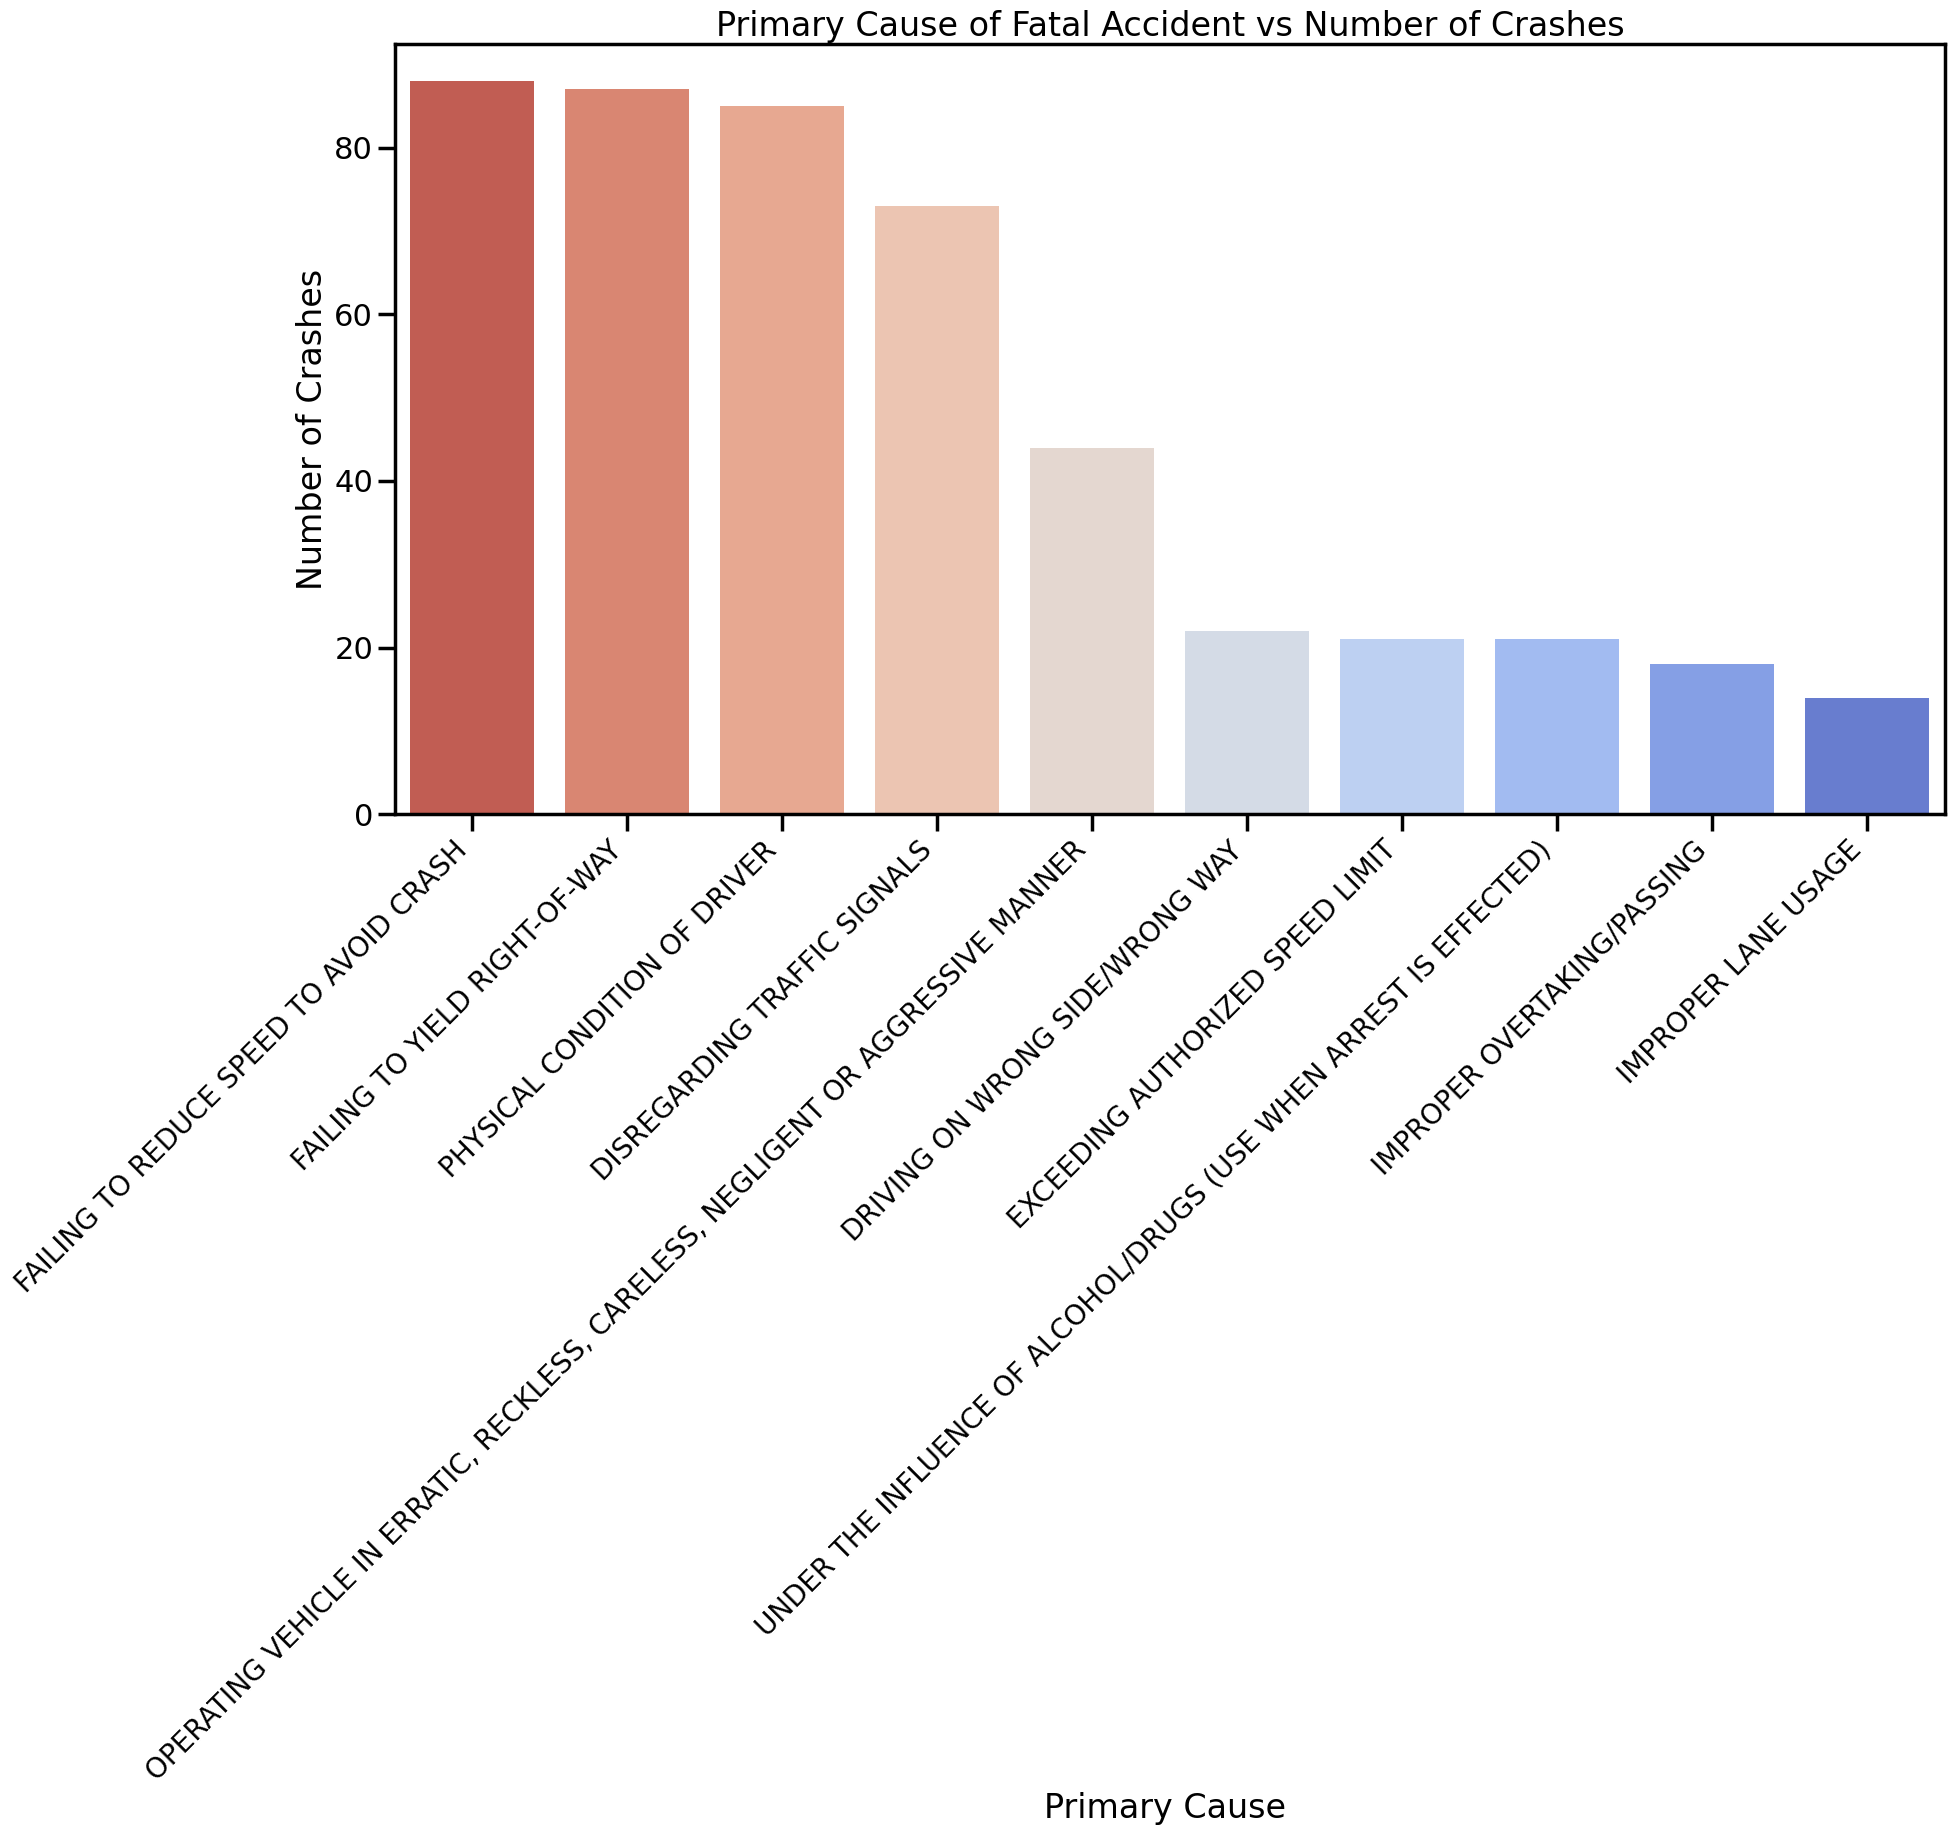

In [78]:
# Figuring out the primary cause of accidents that lead to fatal injuries
sns.set_context("poster")
plt.figure(figsize =(20,10))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="PRIM_CONTRIBUTORY_CAUSE", data=fatal_acc,order = fatal_acc['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10).index, palette= 'coolwarm_r') 
plt.xlabel('Primary Cause ')
plt.ylabel('Number of Crashes')
plt.title('Primary Cause of Fatal Accident vs Number of Crashes')
plt.show()

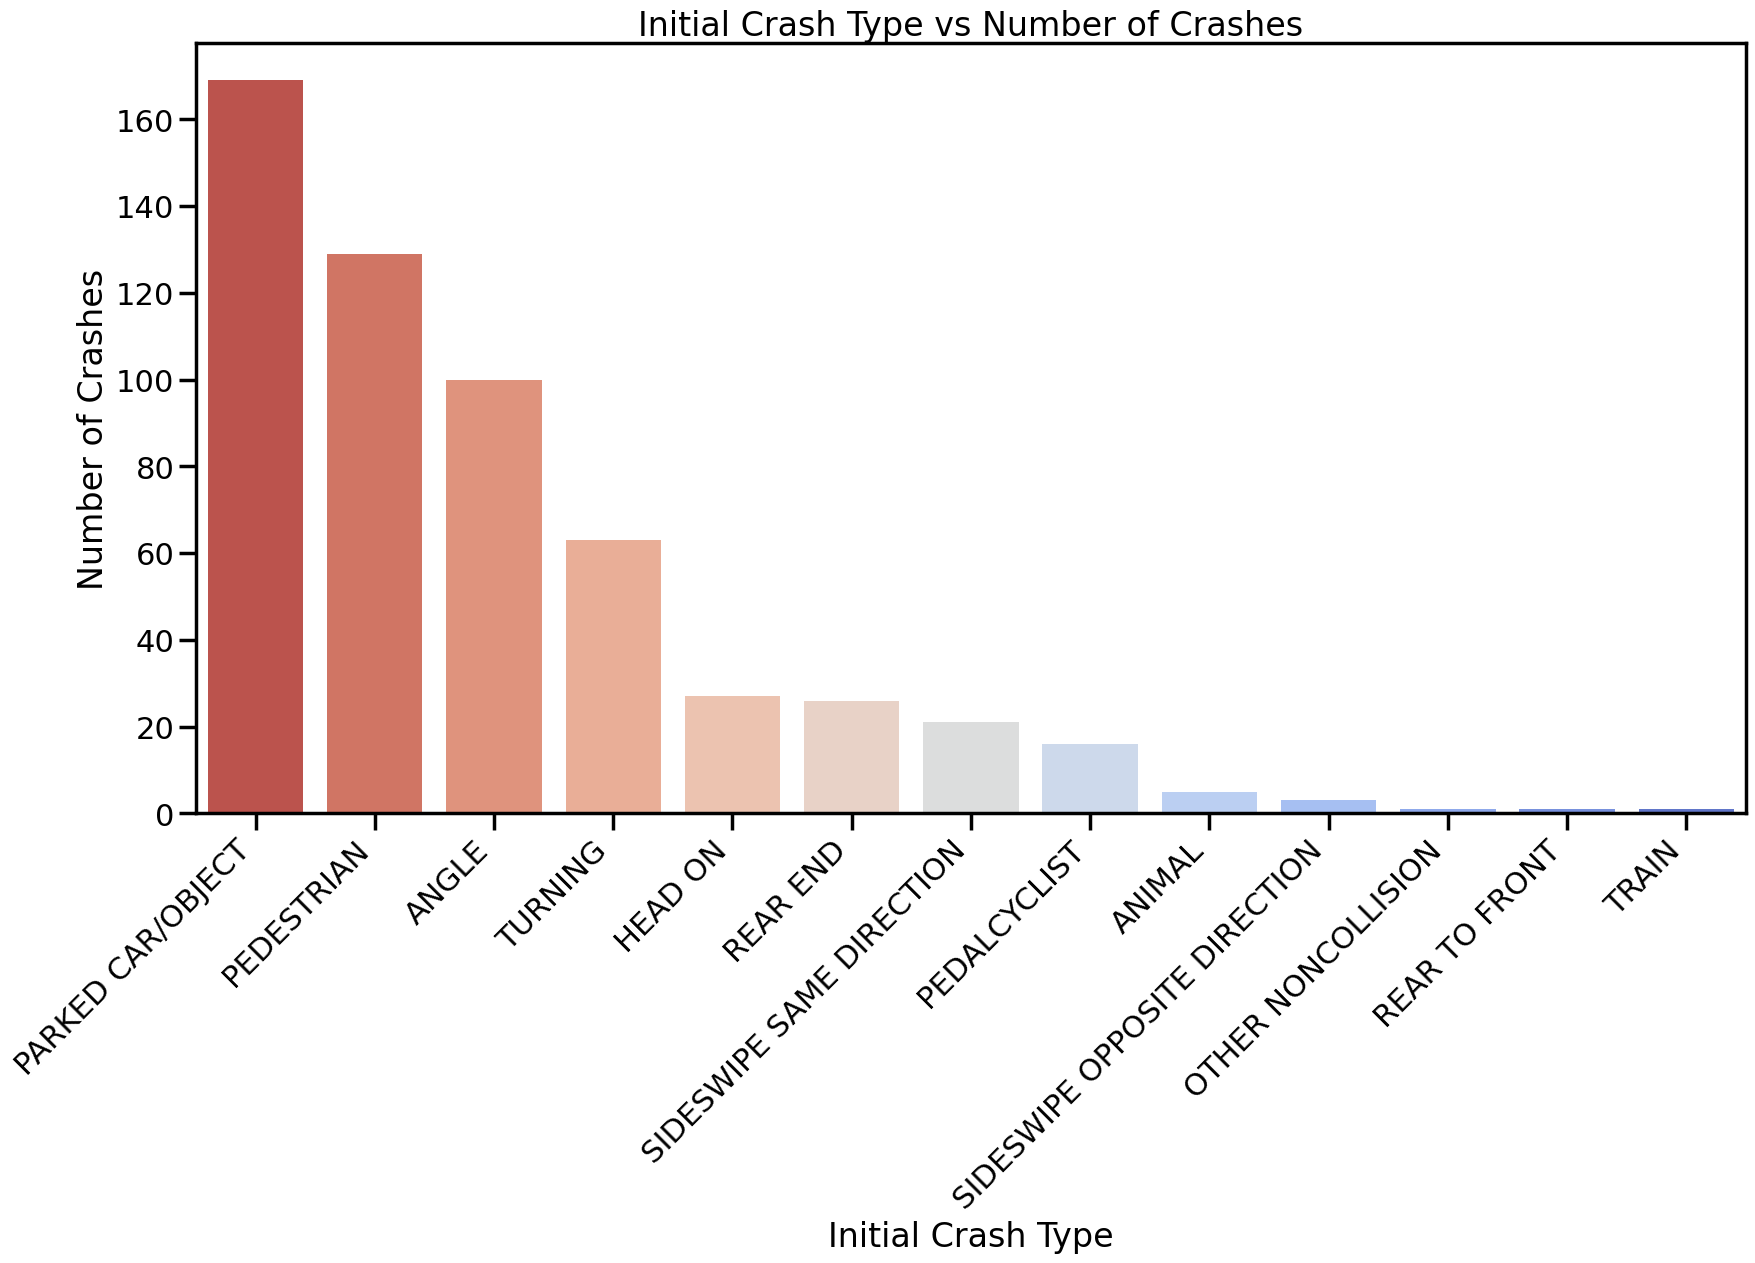

In [80]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="FIRST_CRASH_TYPE", data=fatal_acc, order = fatal_acc['FIRST_CRASH_TYPE'].value_counts().index, palette = 'coolwarm_r')
plt.xlabel('Initial Crash Type')
plt.ylabel('Number of Crashes')
plt.title('Initial Crash Type vs Number of Crashes')
plt.show()

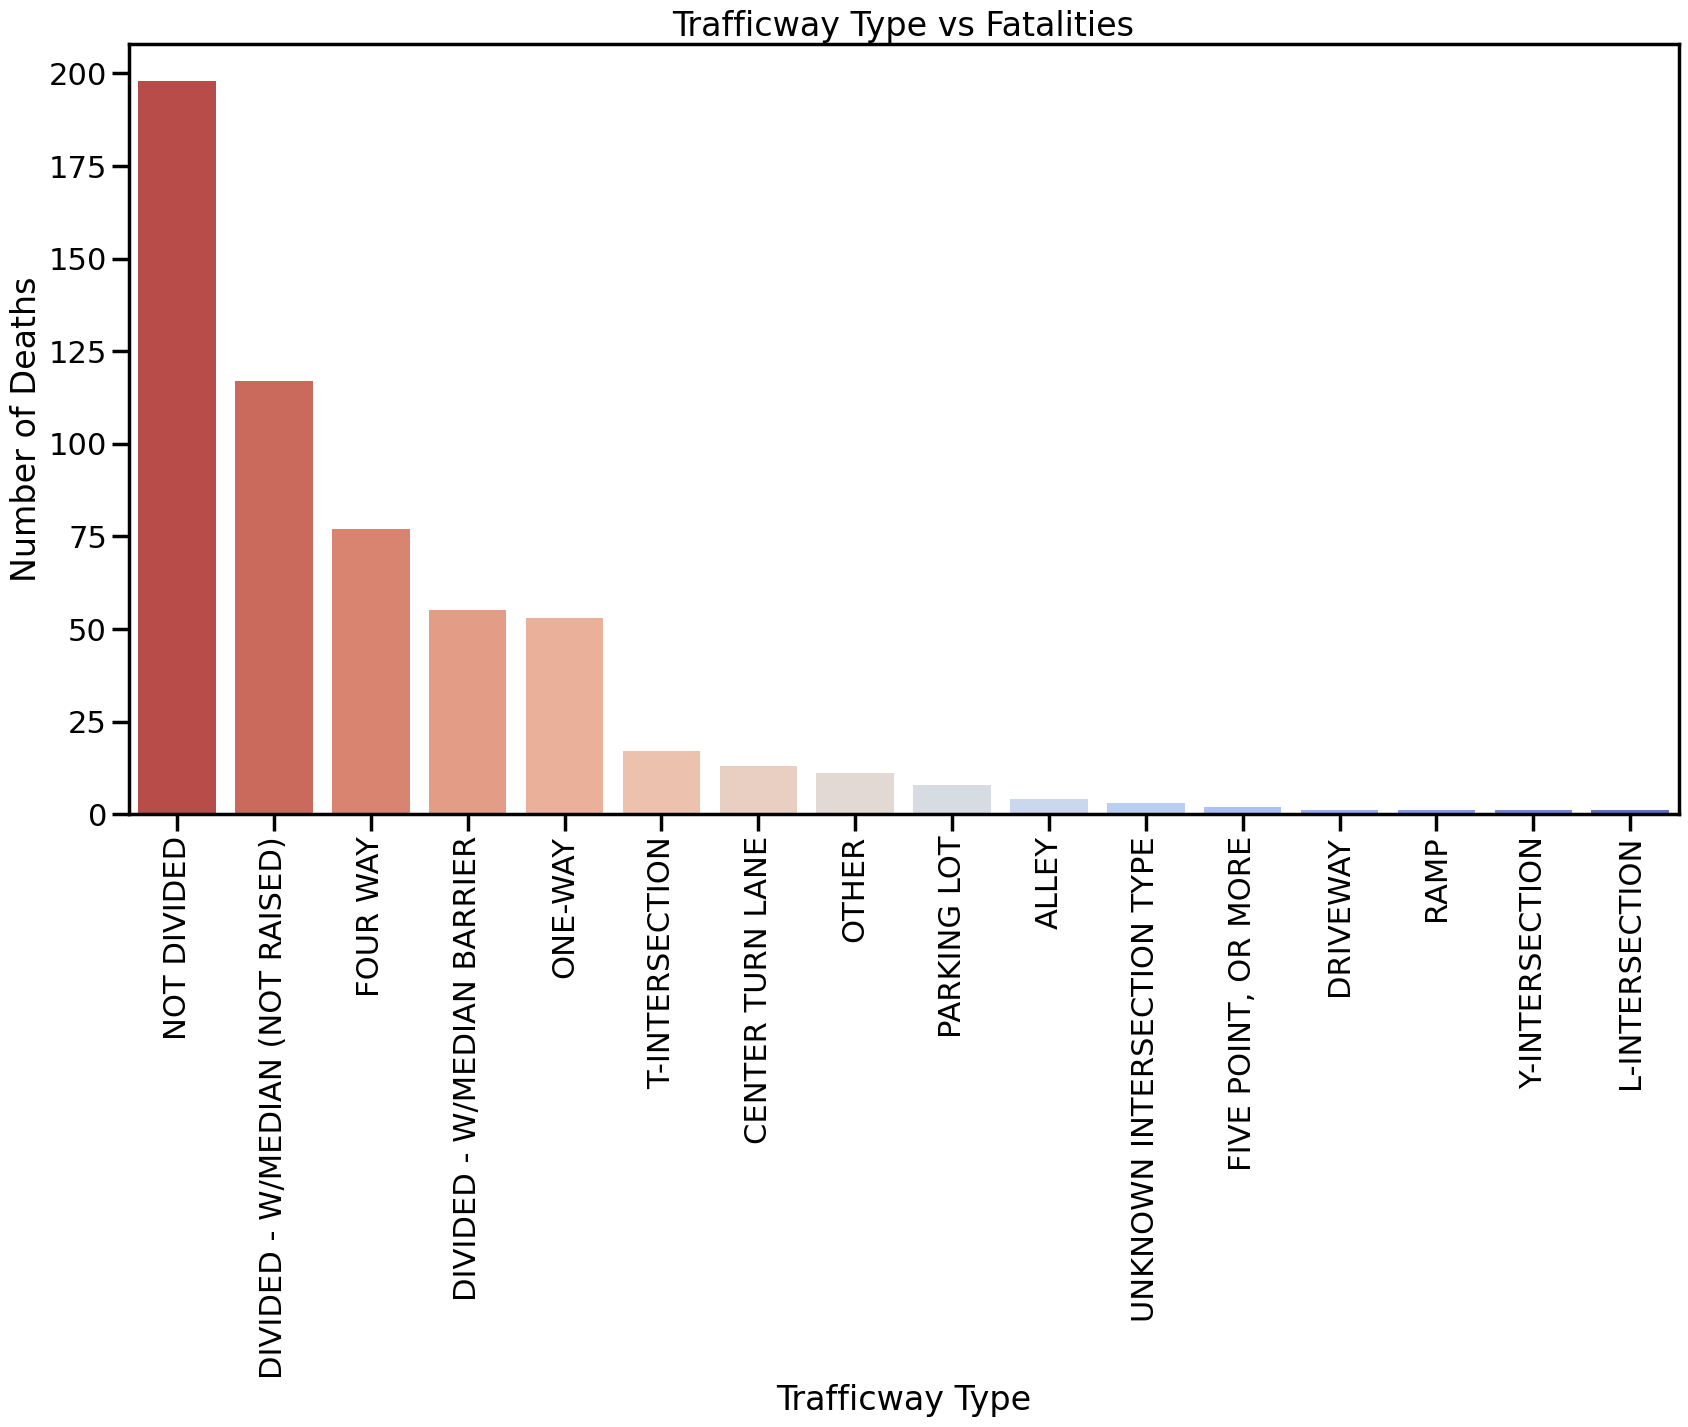

In [81]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=90)

ax = sns.countplot(x="TRAFFICWAY_TYPE", data=fatal_acc,order = fatal_acc['TRAFFICWAY_TYPE'].value_counts().index, palette = 'coolwarm_r')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Deaths')
plt.title('Trafficway Type vs Fatalities')
plt.show()

In [82]:
injury = categorical_df[categorical_df['MOST_SEVERE_INJURY'] != 'NO INJURY']
injury.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83324 entries, 116 to 879737
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                83324 non-null  object 
 1   CRASH_DATE                     83324 non-null  object 
 2   POSTED_SPEED_LIMIT             83324 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         83324 non-null  object 
 4   DEVICE_CONDITION               83324 non-null  object 
 5   WEATHER_CONDITION              83323 non-null  object 
 6   LIGHTING_CONDITION             83324 non-null  object 
 7   FIRST_CRASH_TYPE               83324 non-null  object 
 8   TRAFFICWAY_TYPE                83324 non-null  object 
 9   ALIGNMENT                      83324 non-null  object 
 10  ROAD_DEFECT                    83324 non-null  int64  
 11  INTERSECTION_RELATED_I         83324 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I             83324 non-null  i

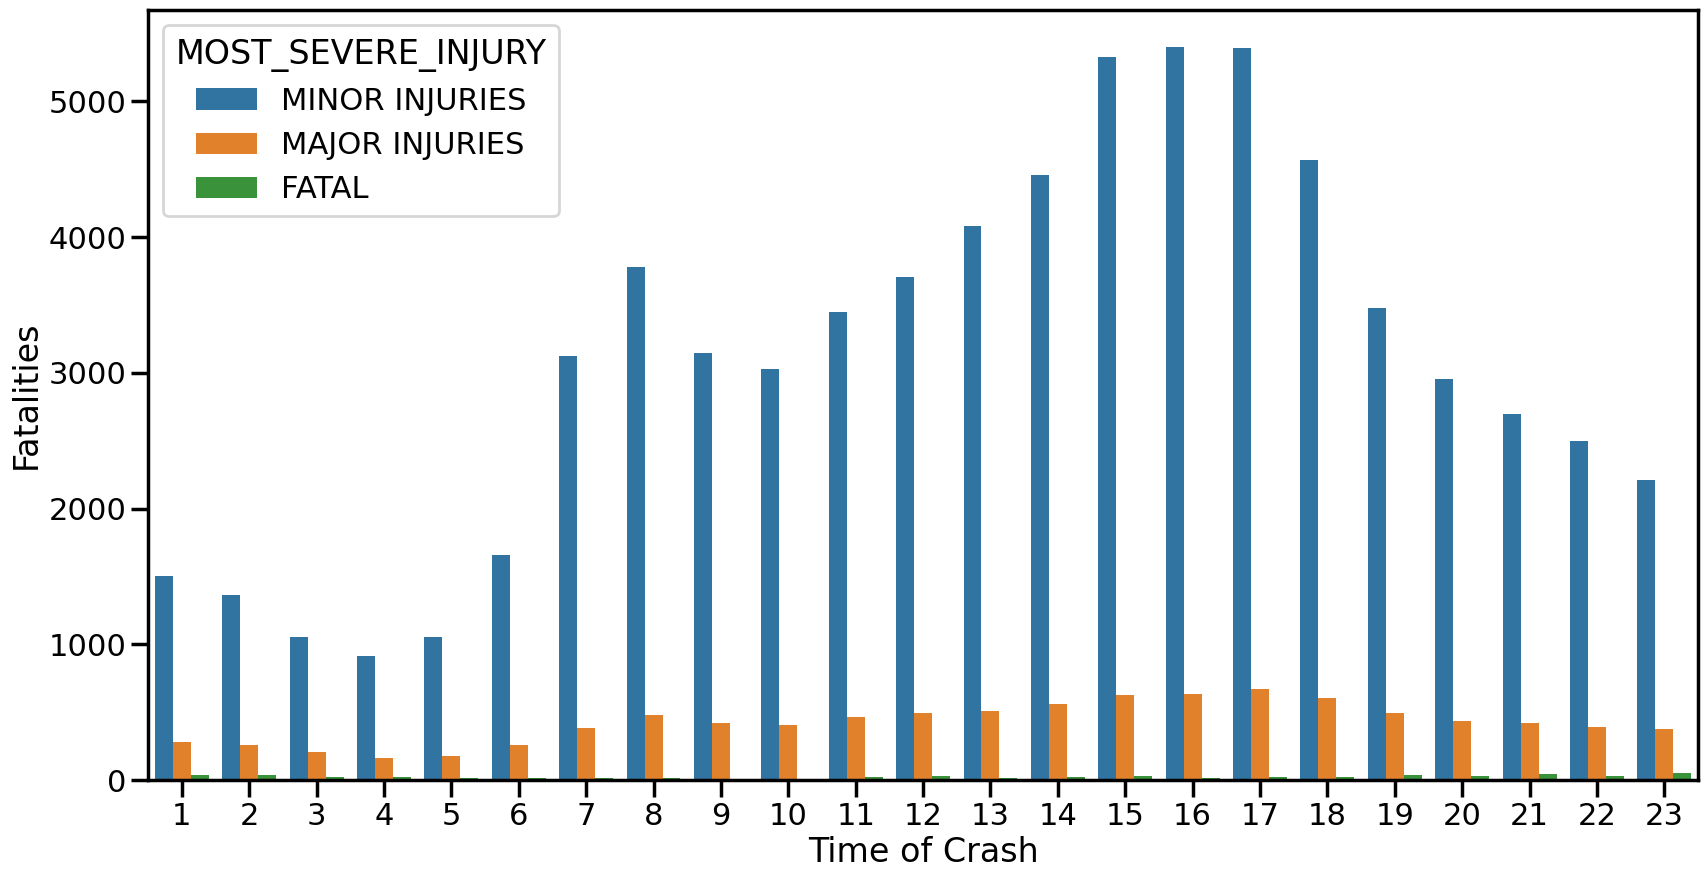

In [90]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_HOUR", hue = 'MOST_SEVERE_INJURY',data=injury,order = range(1,24))
plt.xlabel('Time of Crash')
plt.ylabel('Fatalities')
plt.show()

In [91]:
major_injury = categorical_df[(categorical_df['MOST_SEVERE_INJURY'] != 'NO INJURY') & (categorical_df['MOST_SEVERE_INJURY'] != 'MINOR INJURIES')]
major_injury.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10553 entries, 136 to 879737
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                10553 non-null  object 
 1   CRASH_DATE                     10553 non-null  object 
 2   POSTED_SPEED_LIMIT             10553 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         10553 non-null  object 
 4   DEVICE_CONDITION               10553 non-null  object 
 5   WEATHER_CONDITION              10553 non-null  object 
 6   LIGHTING_CONDITION             10553 non-null  object 
 7   FIRST_CRASH_TYPE               10553 non-null  object 
 8   TRAFFICWAY_TYPE                10553 non-null  object 
 9   ALIGNMENT                      10553 non-null  object 
 10  ROAD_DEFECT                    10553 non-null  int64  
 11  INTERSECTION_RELATED_I         10553 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I             10553 non-null  i

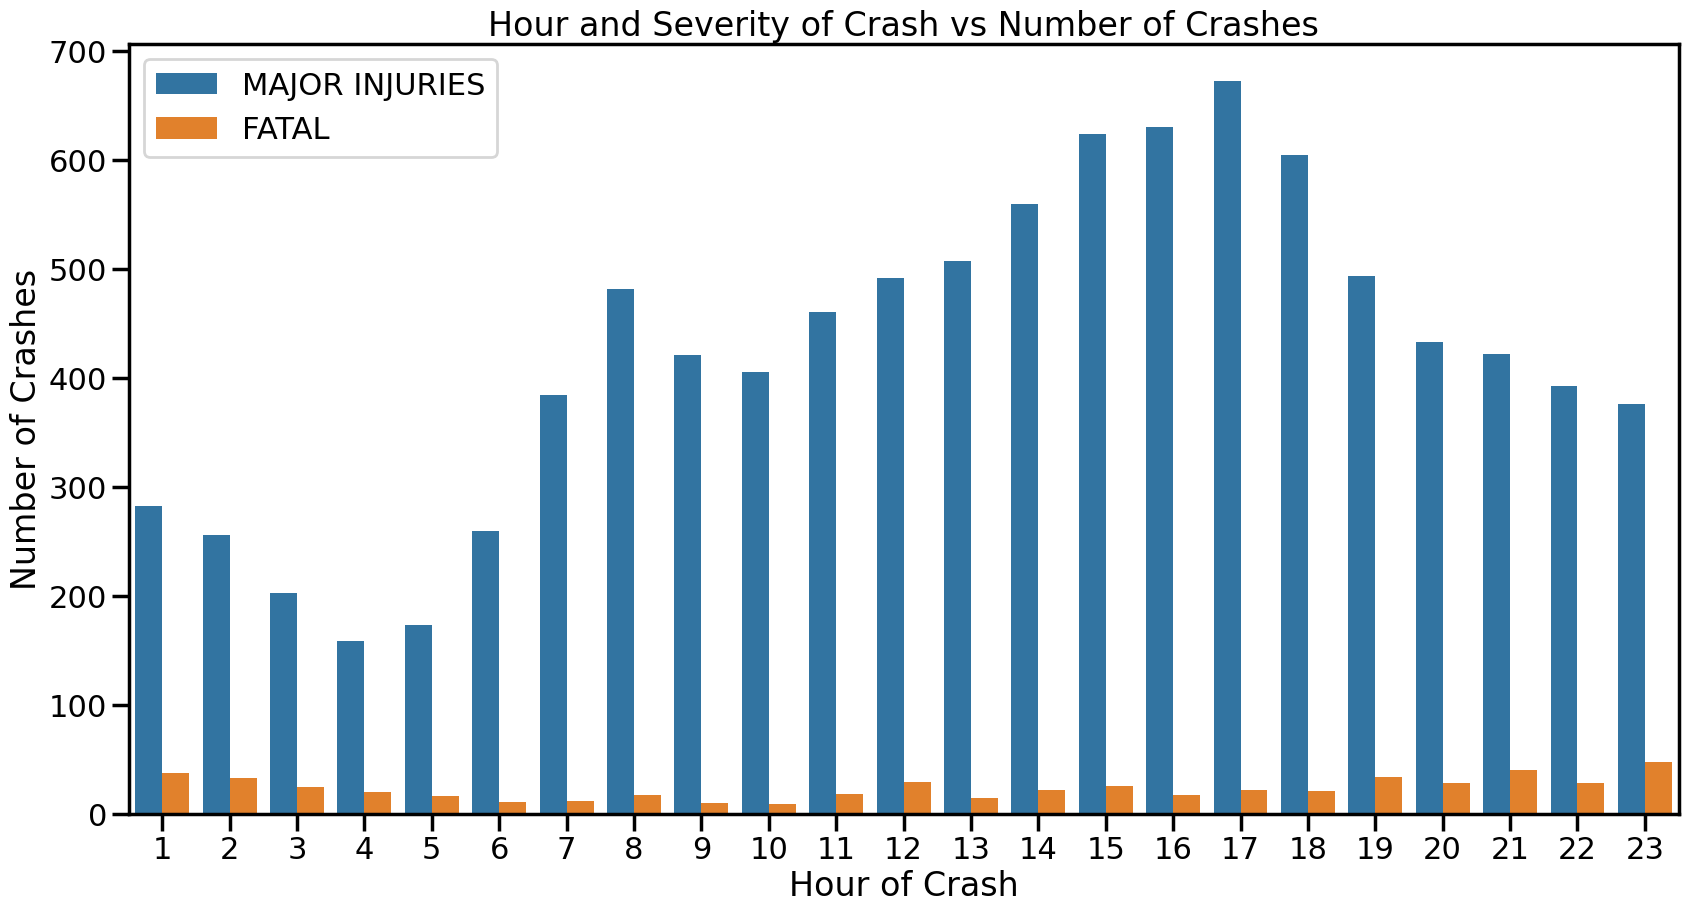

In [92]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_HOUR", hue = 'MOST_SEVERE_INJURY',data=major_injury,order = range(1,24))
plt.xlabel('Hour of Crash')
plt.ylabel('Number of Crashes')
plt.title('Hour and Severity of Crash vs Number of Crashes')
plt.legend(loc = 'upper left')
plt.show()

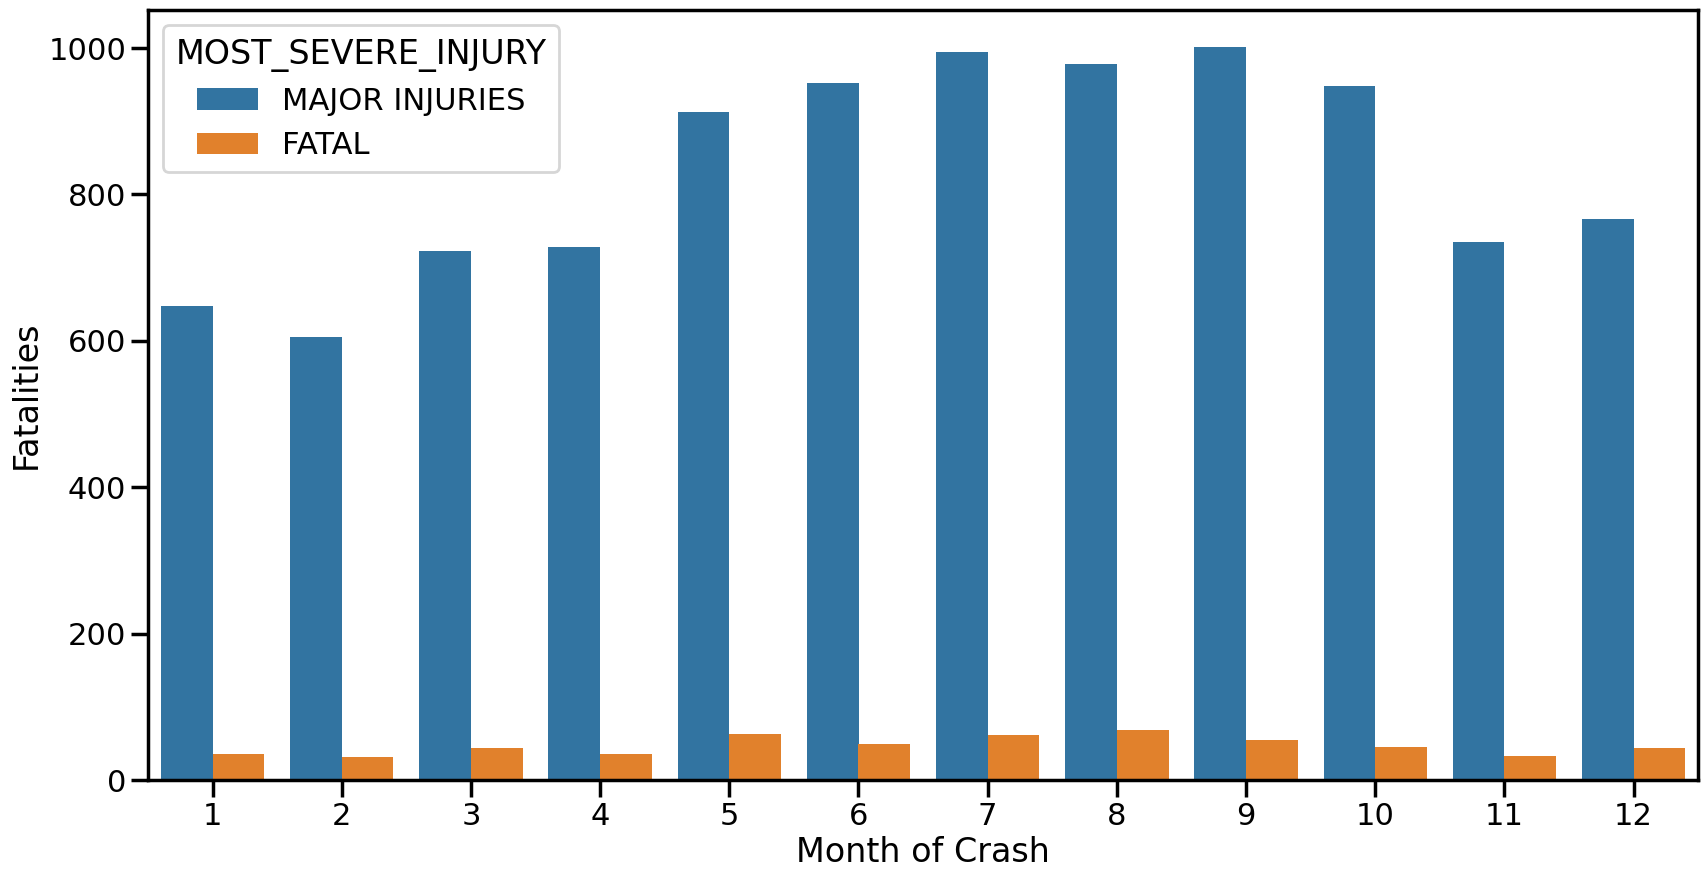

In [94]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_MONTH", hue = 'MOST_SEVERE_INJURY',data=major_injury,order = range(1,13))
plt.xlabel('Month of Crash')
plt.ylabel('Fatalities')
plt.show()

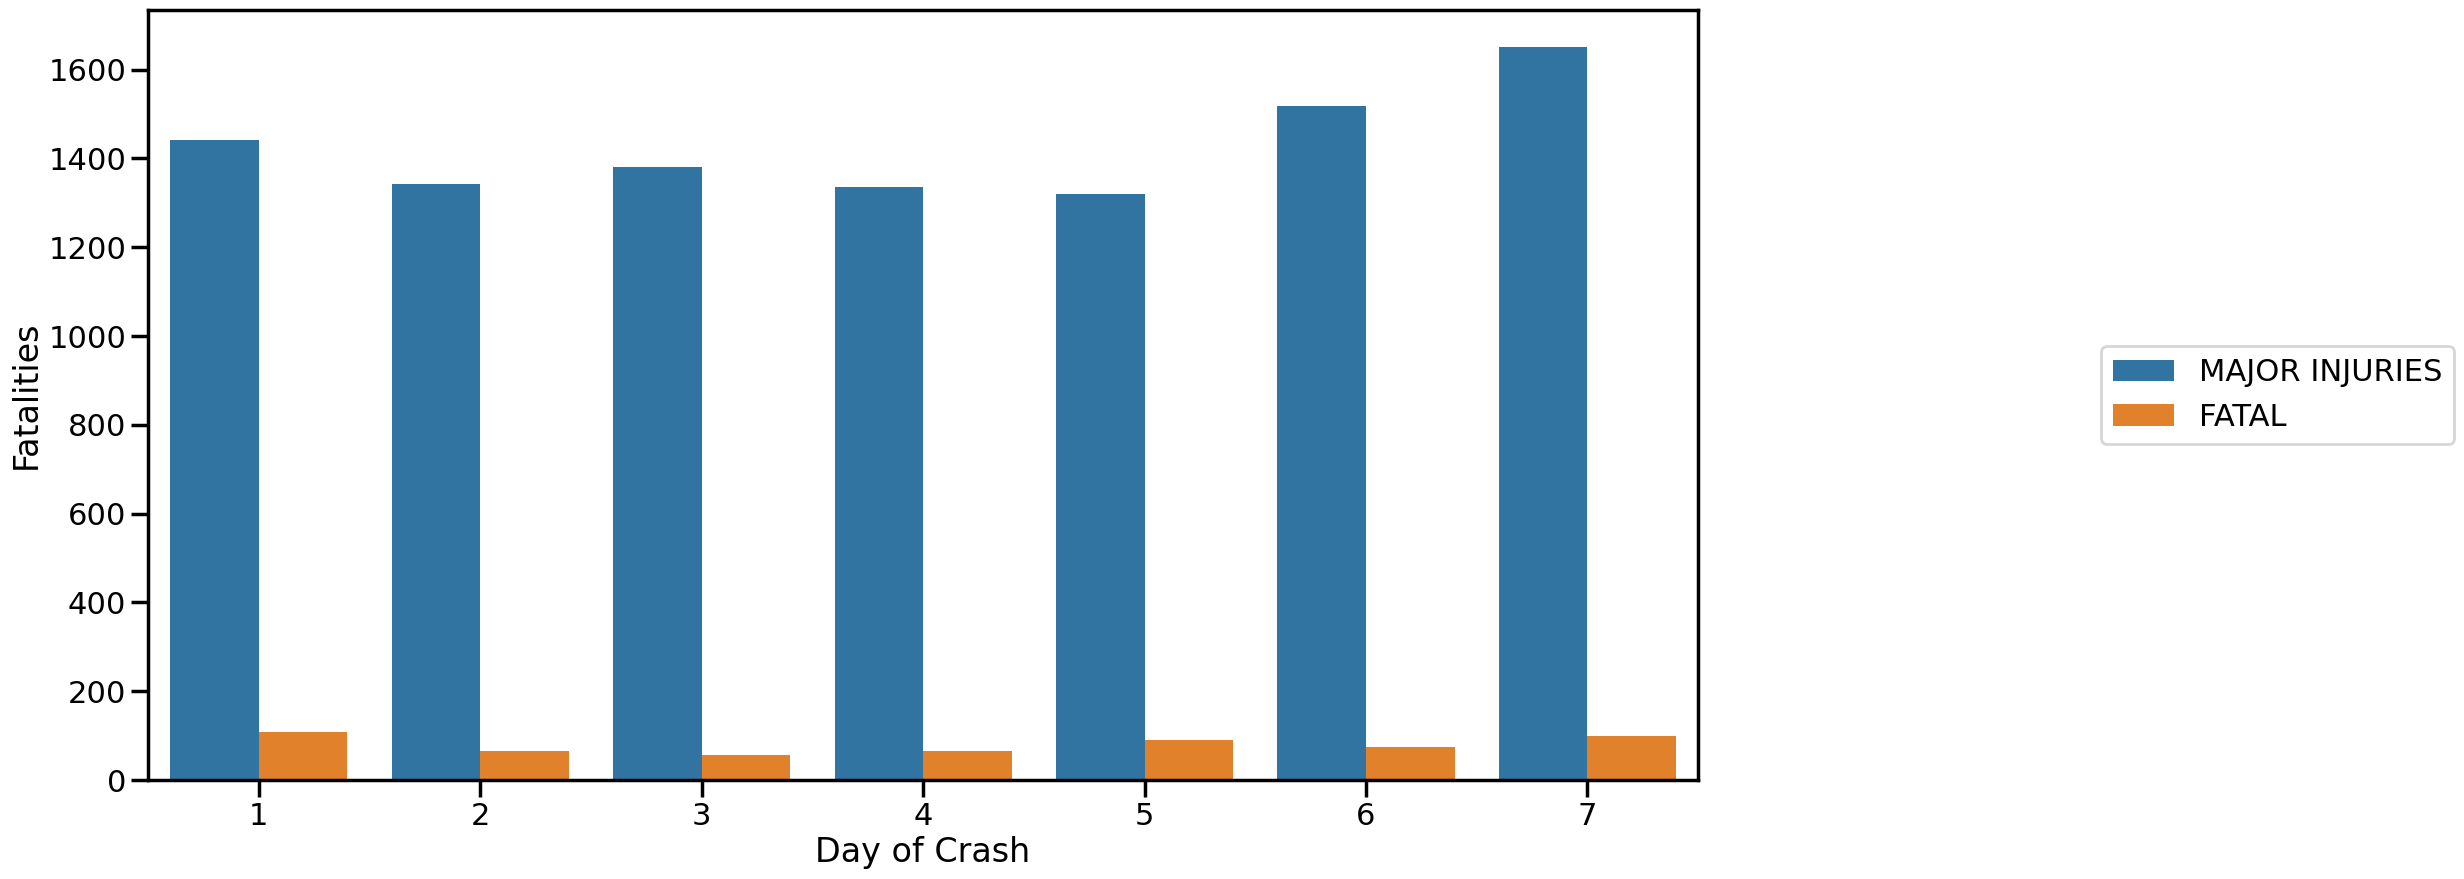

In [95]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_DAY_OF_WEEK", hue = 'MOST_SEVERE_INJURY',data=major_injury,order = range(1,8))
plt.xlabel('Day of Crash')
plt.ylabel('Fatalities')
plt.legend(fancybox=True,loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

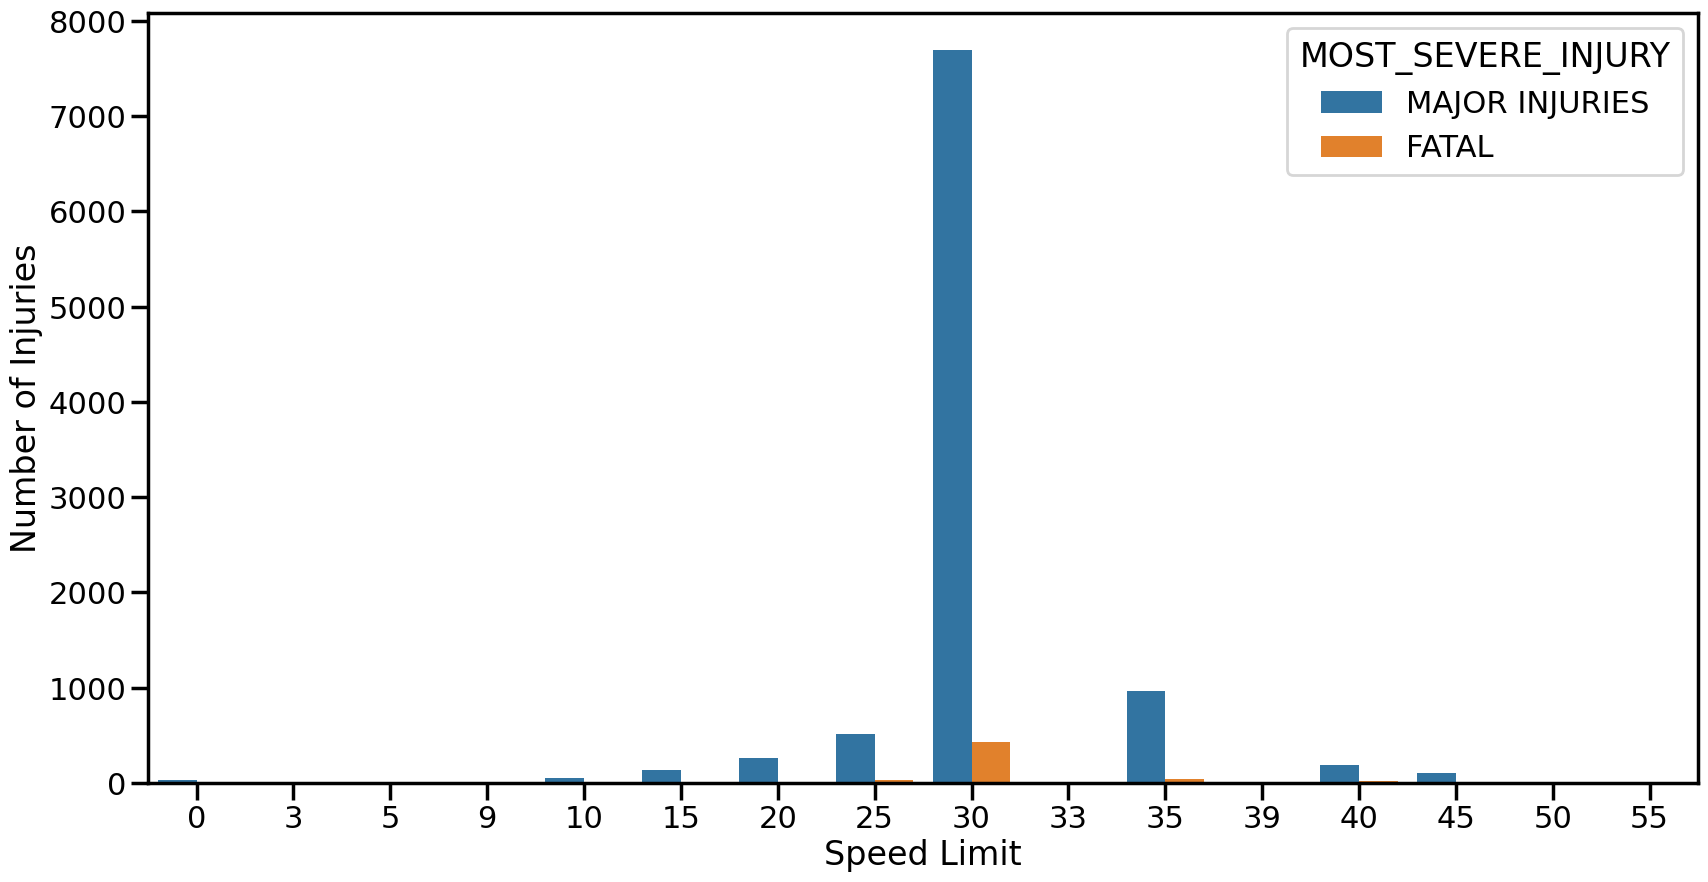

In [96]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="POSTED_SPEED_LIMIT", hue = 'MOST_SEVERE_INJURY',data=major_injury)
plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')
plt.show()

In [97]:
primary_cause.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494705 entries, 2 to 879739
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                494705 non-null  object 
 1   POSTED_SPEED_LIMIT             494705 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE         494705 non-null  object 
 3   DEVICE_CONDITION               494705 non-null  object 
 4   WEATHER_CONDITION              494702 non-null  object 
 5   LIGHTING_CONDITION             494705 non-null  object 
 6   FIRST_CRASH_TYPE               494705 non-null  object 
 7   TRAFFICWAY_TYPE                494705 non-null  object 
 8   ALIGNMENT                      494705 non-null  object 
 9   ROAD_DEFECT                    494705 non-null  int64  
 10  INTERSECTION_RELATED_I         494705 non-null  int64  
 11  NOT_RIGHT_OF_WAY_I             494705 non-null  int64  
 12  HIT_AND_RUN_I                  4947